In [23]:
import pandas as pd
import matplotlib.pyplot as plt 

In [24]:
data_optimism = pd.read_csv("../Data_Souce/optimism_delegate.csv", encoding='latin1')
data_compound = pd.read_csv("../Data_Souce/compound_delegate.csv", encoding='latin1')
data_aave = pd.read_csv("../Data_Souce/aave_delegate.csv", encoding='latin1')
data_uniswap = pd.read_csv("../Data_Souce/uniswap_delegate.csv", encoding='latin1')

In [25]:
print(data_optimism.shape)
print(data_compound.shape)
print(data_aave.shape)
print(data_uniswap.shape)

(226569, 2)
(11220, 3)
(150840, 3)
(45140, 3)


In [26]:
# # Convert the voting_power column to numeric type
# data_compound['voting_power'] = pd.to_numeric(data_compound['voting_power'], errors='coerce')
# data_aave['voting_power'] = pd.to_numeric(data_aave['voting_power'], errors='coerce')
# data_uniswap['voting_power'] = pd.to_numeric(data_uniswap['voting_power'], errors='coerce')

# # Divide the voting_power by 10^18
# data_compound['voting_power'] = data_compound['voting_power'] / pow(10, 18)
# data_aave['voting_power'] = data_aave['voting_power'] / pow(10, 18)
# data_uniswap['voting_power'] = data_uniswap['voting_power'] / pow(10, 18)

In [27]:
# data_compound.to_csv(r"F:\Measuring COP\Final Data\compound_delegate.csv")
# data_aave.to_csv(r"F:\Measuring COP\Final Data\aave_delegate.csv")
# data_uniswap.to_csv(r"F:\Measuring COP\Final Data\uniswap_delegate.csv")

In [28]:
df_optimism = data_optimism[data_optimism['voting_power'] > 1]
df_compound = data_compound[data_compound['voting_power'] > 1]
df_aave = data_aave[data_aave['voting_power'] > 1]
df_uniswap= data_uniswap[data_uniswap['voting_power'] > 1]

In [29]:
print(df_optimism.shape)
print(df_compound.shape)
print(df_aave.shape)
print(df_uniswap.shape)

(56510, 2)
(325, 3)
(37646, 3)
(13049, 3)


In [30]:
sum_voting_power_op = df_optimism['voting_power'].sum()
print("Total voting power of Optimism delegates:", round(sum_voting_power_op, 3))
sum_voting_power_comp = df_compound['voting_power'].sum()
print("Total voting power of Compound delegates:", round(sum_voting_power_comp, 2))
sum_voting_power_aave = df_aave['voting_power'].sum()
print("Total voting power of AAVE delegates:", round(sum_voting_power_aave, 2))
sum_voting_power_uni = df_uniswap['voting_power'].sum()
print("Total voting power of Uniswap delegates:", round(sum_voting_power_uni, 2))

Total voting power of Optimism delegates: 94107352.356
Total voting power of Compound delegates: 2074350.83
Total voting power of AAVE delegates: 13201493.42
Total voting power of Uniswap delegates: 200540823.71


In [31]:
# Calculate the share of each delegate and its square
df_optimism['share'] = ((df_optimism['voting_power'] * 100) / sum_voting_power_op)
df_optimism['share_squared'] = df_optimism['share'] ** 2
HHI_OP = df_optimism['share_squared'].sum()
print("HHI of Optimism:", HHI_OP)

# Calculate the share of each delegate and its square
df_compound['share'] = ((df_compound['voting_power'] * 100) / sum_voting_power_comp)
df_compound['share_squared'] = df_compound['share'] ** 2
HHI_COMP = df_compound['share_squared'].sum()
print("HHI of Compound", HHI_COMP)

# Calculate the share of each delegate and its square
df_aave['share'] = ((df_aave['voting_power']) * 100 / sum_voting_power_aave)
df_aave['share_squared'] = df_aave['share'] ** 2
HHI_AAVE = df_aave['share_squared'].sum()
print("HHI of Aave", HHI_AAVE)

# Calculate the share of each delegate and its square
df_uniswap['share'] = ((df_uniswap['voting_power'] * 100) / sum_voting_power_uni)
df_uniswap['share_squared'] = df_uniswap['share'] ** 2
HHI_UNI = df_uniswap['share_squared'].sum()
print("HHI of Uniswap", HHI_UNI)

HHI of Optimism: 318.7837603000506
HHI of Compound 233.84902850685933
HHI of Aave 627.333390164009
HHI of Uniswap 222.79780089908166


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16948\2806173903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimism['share'] = ((df_optimism['voting_power'] * 100) / sum_voting_power_op)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16948\2806173903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimism['share_squared'] = df_optimism['share'] ** 2
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16948\2806173903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

## HHI for DAOs

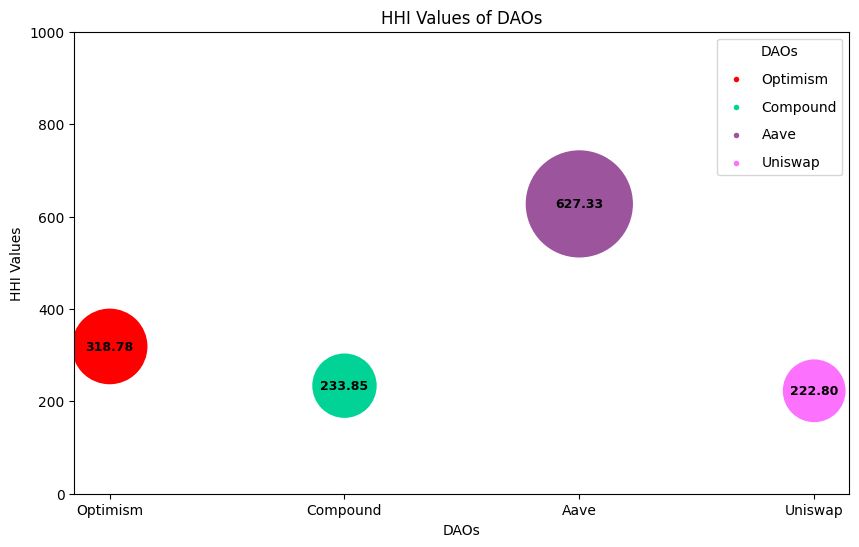

In [32]:
# Data
labels = ['Optimism', 'Compound', 'Aave', 'Uniswap']
hhi_values = [HHI_OP, HHI_COMP, HHI_AAVE, HHI_UNI]
colors = ['red', '#00D395', '#9c559c', '#fc72ff']

# Bubble sizes (proportional to HHI values)
bubble_sizes = [value * 10 for value in hhi_values]  # Scaling up for better visibility

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(labels, hhi_values, s=bubble_sizes, c=colors, edgecolors="w", linewidth=2)

# Annotate each bubble with the HHI value
for i in range(len(labels)):
    plt.text(labels[i], hhi_values[i], f'{hhi_values[i]:.2f}', ha='center', va='center', fontsize=9, color='black', weight='bold')

# Labels and title
plt.xlabel('DAOs')
plt.ylabel('HHI Values')
plt.title('HHI Values of DAOs')

# Set y-axis range
plt.ylim(0, 1000)

# Add legend
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, edgecolor='w', linewidth=2, label=label)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="DAOs")

# Display the chart
plt.show()

## mHHI Values for Optimism

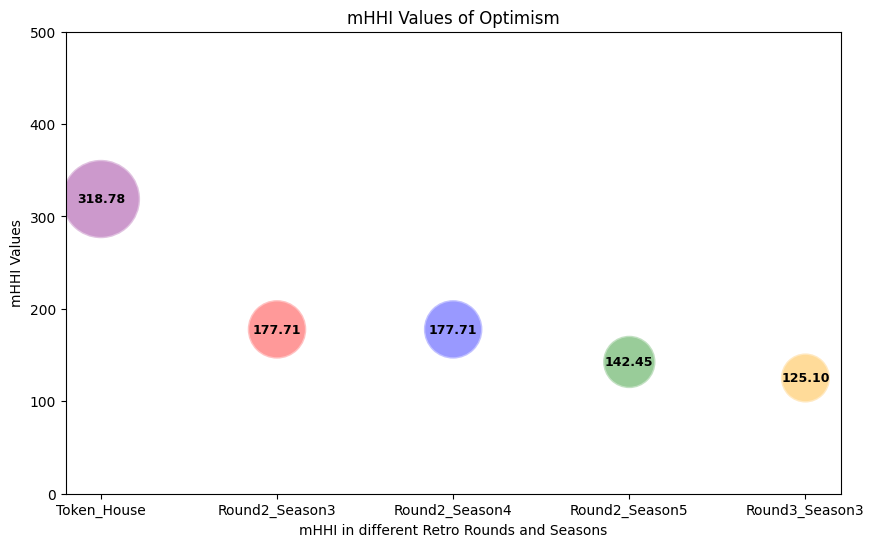

In [33]:
# Data
labels = ['Token_House', 'Round2_Season3', 'Round2_Season4', 'Round2_Season5', 'Round3_Season3']
mhhi_values = [318.78, 177.71, 177.71, 142.45, 125.10]
colors = ['purple', 'red', 'blue', 'green', 'orange']

# Bubble sizes (proportional to HHI values)
bubble_sizes = [value * 10 for value in mhhi_values]  # Scaling up for better visibility

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(labels, mhhi_values, s=bubble_sizes, alpha=0.4, c=colors, edgecolors="w", linewidth=2)

# Annotate each bubble with the HHI value
for i in range(len(labels)):
    plt.text(labels[i], mhhi_values[i], f'{mhhi_values[i]:.2f}', ha='center', va='center', fontsize=9, color='black', weight='bold')

# Labels and title
plt.xlabel('mHHI in different Retro Rounds and Seasons')
plt.ylabel('mHHI Values')
plt.title('mHHI Values of Optimism')

# Set y-axis range
plt.ylim(0, 500)

# Display the chart
plt.show()

## Nakamoto Coefficient for DAOs

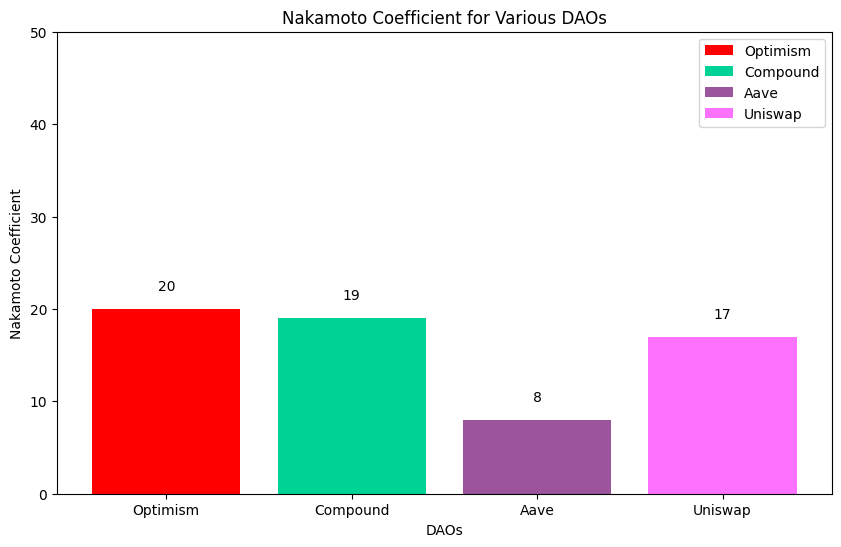

In [34]:
import matplotlib.pyplot as plt

# HHI values
nakamoto_values = {
    'Optimism': 20,
    'Compound': 19,
    'Aave': 8,
    'Uniswap': 17
}

# Extract labels and values
labels = list(nakamoto_values.keys())
values = list(nakamoto_values.values())

# Colors for each DAO
colors = ['red', '#00D395', '#9c559c', '#fc72ff']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Add title and labels
plt.title('Nakamoto Coefficient for Various DAOs')
plt.xlabel('DAOs')
plt.ylabel('Nakamoto Coefficient')
plt.ylim(0, 50)

# Annotate the HHI values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value+2, f'{value}', ha='center')

# Add legend
legend_labels = ['Optimism', 'Compound', 'Aave', 'Uniswap']
plt.legend(bars, legend_labels)

# Show the chart
plt.show()

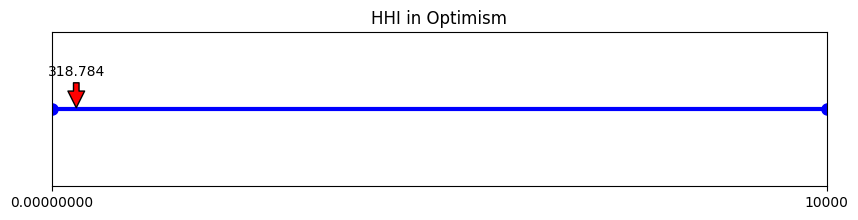

In [35]:
# Define the range
range_start = 0
range_end = 10000

# Define the value to annotate
value_to_annotate = round(HHI_OP, 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Draw the line for the range
ax.plot([range_start, range_end], [0.5, 0.5], color='blue', linewidth=3, marker='o', markersize=8)
ax.set_xlim(range_start, range_end)
ax.set_ylim(0, 1)

# Annotate the value
ax.annotate(f'{value_to_annotate}', xy=(value_to_annotate, 0.5), xytext=(value_to_annotate, 0.7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels
ax.set_xticks([range_start, range_end])
ax.set_xticklabels([f'{range_start:.8f}', '10000'])

# Add title
plt.title('HHI in Optimism')

# Show the plot
plt.show()

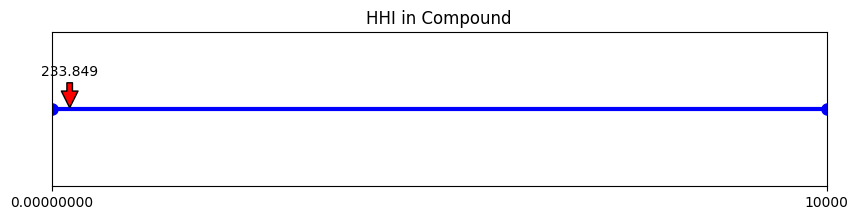

In [36]:
# Define the range
range_start = 0
range_end = 10000

# Define the value to annotate
value_to_annotate = round(HHI_COMP, 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Draw the line for the range
ax.plot([range_start, range_end], [0.5, 0.5], color='blue', linewidth=3, marker='o', markersize=8)
ax.set_xlim(range_start, range_end)
ax.set_ylim(0, 1)

# Annotate the value
ax.annotate(f'{value_to_annotate}', xy=(value_to_annotate, 0.5), xytext=(value_to_annotate, 0.7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels
ax.set_xticks([range_start, range_end])
ax.set_xticklabels([f'{range_start:.8f}', '10000'])

# Add title
plt.title('HHI in Compound')

# Show the plot
plt.show()

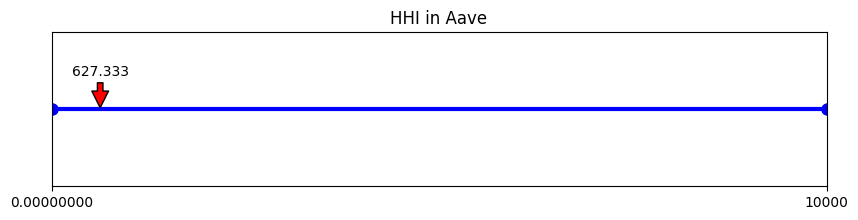

In [37]:
# Define the range
range_start = 0
range_end = 10000

# Define the value to annotate
value_to_annotate = round(HHI_AAVE, 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Draw the line for the range
ax.plot([range_start, range_end], [0.5, 0.5], color='blue', linewidth=3, marker='o', markersize=8)
ax.set_xlim(range_start, range_end)
ax.set_ylim(0, 1)

# Annotate the value
ax.annotate(f'{value_to_annotate}', xy=(value_to_annotate, 0.5), xytext=(value_to_annotate, 0.7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels
ax.set_xticks([range_start, range_end])
ax.set_xticklabels([f'{range_start:.8f}', '10000'])

# Add title
plt.title('HHI in Aave')

# Show the plot
plt.show()

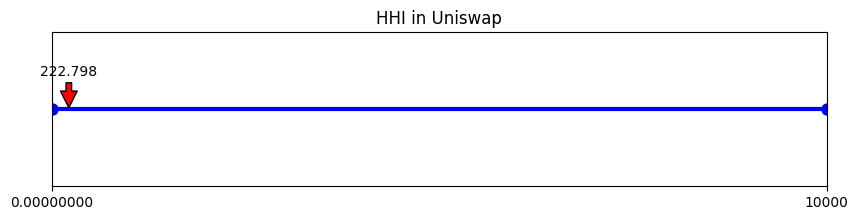

In [38]:
# Define the range
range_start = 0
range_end = 10000

# Define the value to annotate
value_to_annotate = round(HHI_UNI, 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Draw the line for the range
ax.plot([range_start, range_end], [0.5, 0.5], color='blue', linewidth=3, marker='o', markersize=8)
ax.set_xlim(range_start, range_end)
ax.set_ylim(0, 1)

# Annotate the value
ax.annotate(f'{value_to_annotate}', xy=(value_to_annotate, 0.5), xytext=(value_to_annotate, 0.7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels
ax.set_xticks([range_start, range_end])
ax.set_xticklabels([f'{range_start:.8f}', '10000'])

# Add title
plt.title('HHI in Uniswap')

# Show the plot
plt.show()